## Desafio_1

Agora vamos praticas tudo o que aprendemos no módulo 1 utilizando dados reais do CAGED (Cadastro Geral de Empregados e Desempregados)

<br>
<img src="img/caged.png" width='280' >
<br>

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT).

É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Este Cadastro serve, ainda, como base para a elaboração de estudos, pesquisas, projetos e programas ligados ao mercado de trabalho, ao mesmo tempo em que subsidia a tomada de decisões para ações governamentais.

Visite o sitee do CAGED através [deste link](http://trabalho.gov.br/trabalhador-caged/2015-09-10-17-46-22) e acesse os dados clicando inicialemente em **ESTATÍSTICA** e depois em **MICRODADOS**, então acesse a base de dados do CAGED e baixe o último arquivo do ano de 2018 **CAGEDEST_122018.7z**. Além disso, baize também o arquivo **CAGEDEST_layout_Atualizado.xls** para o dicionário de dados.
Chegando [NESTE LINK](ftp://ftp.mtps.gov.br/pdet/microdados/)
Após isso, podemos começar as nossas análises:

1. **Importar as bibliotecas** e ler os dados: Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.

2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

4. Verificação dos dados da variável **Grau de Instrução**: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

7. Elaborar uma hipótese para ser rejeitada ou não-rejeitada por você de acordo com o resultado da sua análise, através da utilização dos dados do CAGED considerando as suas colunas.

8. Avançado: plote um SEABORN heatmap com **todas as correlações das variávies numéricas entre si**. 

9. Avançado: Plote uma **regressão múltipla**.


In [ ]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import random

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Importando dataframe: Local

In [ ]:
#Importanto dataframe guia - Local
df_guia=pd.read_excel(r"\CAGEDEST_layout.xls")
#Importanto data frame - Local
df = pd.read_csv(r'CAGEDEST_122018.txt',
                 sep = ';',
                 decimal = ',',
                thousands = '.', 
                encoding='latin1', 
                 usecols = ['Admitidos/Desligados','Competência Declarada', 'Ano Declarado', 'Sexo', 'Município', 'Grau Instrução', 'Salário Mensal', 'Idade', 'Raça Cor', 'UF', 'Tempo Emprego']
                )

# Importando dataframe: Colab

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#import os
#os.getcwd()

In [ ]:
# Importanto dataframe guia - Colab
#df_guia = pd.read_excel(")
# Importanto data frame - Colab
#df = pd.read_csv(r"",
 #                sep = ';',
 #                decimal = ',',
 #               thousands = '.', 
 #               encoding='latin1', 
  #              usecols = ['Admitidos/Desligados','Competência Declarada', 'Ano Declarado', 'Sexo' ,'Município', 'Grau Instrução', 'Salário Mensal', 'Idade', 'Raça Cor', 'UF', 'Tempo Emprego']
#                )

In [ ]:
#Explorando df
df.head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo,Tempo Emprego,UF
0,1,201812,500215,2018,6,24,8,954.0,1,0.0,50
1,1,201812,500710,2018,8,25,2,2500.0,1,0.0,50
2,1,201812,500460,2018,2,55,8,0.0,1,0.0,50
3,1,201812,500460,2018,2,52,8,0.0,1,0.0,50
4,1,201812,500460,2018,2,32,8,0.0,1,0.0,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Admitidos/Desligados   int64  
 1   Competência Declarada  int64  
 2   Município              int64  
 3   Ano Declarado          int64  
 4   Grau Instrução         int64  
 5   Idade                  int64  
 6   Raça Cor               int64  
 7   Salário Mensal         float64
 8   Sexo                   int64  
 9   Tempo Emprego          float64
 10  UF                     int64  
dtypes: float64(2), int64(9)
memory usage: 189.4 MB


In [ ]:
df.index

RangeIndex(start=0, stop=2256752, step=1)

### 2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variável Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.
__________________________________________________________________________________________________________________________________________________________________________________________________________________________

#### <font color='yellow'>Limpeza 1 - Removendo valores que são zero, pois são maioria e estão atrapalhando a interpretação da dispersão.</font>

In [ ]:
#Limpeza 1 - Removendo valores que são zero, pois são maioria e estão atrapalhando a interpretação da dispersão.
#df.loc[(df['Salário Mensal'] <= 0, 'Salário Mensal')]=1
#df
#df_limpeza_zeros = df.drop(remover_valores0_do_sal_mensal.index)
#df_limpeza_zeros.reset_index()

# Observação sobre a célula anterior
 - No começo do meu racíocinio, considerei que todos os campos alimentados com zero na coluna Salário Mensal deviam ser excluídos.
 - Mas ao rever a aula, a conclusão foi outra:
     **A conclusão** foi que ao eliminar essas linhas, estarei eliminando dados importantes do meu dataset, posso estar eliminando dados que:
- Afetem a média;
- Pode ser um tratamento para valores nulos, de um tratamento anterior;

Depende do que será feito a posteriormente com esses dados, por exemplo:
No caso do exercício vamos aplicar um log ou até outro método que não permita "zeros" na tabela.

In [ ]:
df['Salário Mensal'].min()

0.0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Admitidos/Desligados,2256752.0,1.574103,0.494478,1.0,1.0,2.0,2.0,2.0
Competência Declarada,2256752.0,201812.000000,0.000000,201812.0,201812.0,201812.0,201812.0,201812.0
Município,2256752.0,355386.287837,83000.731507,110001.0,314700.0,353150.0,411790.0,530010.0
Ano Declarado,2256752.0,2018.000000,0.000000,2018.0,2018.0,2018.0,2018.0,2018.0
Grau Instrução,2256752.0,6.595547,1.548538,1.0,6.0,7.0,7.0,9.0
Idade,2256752.0,32.314226,10.960189,10.0,23.0,30.0,39.0,103.0
Raça Cor,2256752.0,5.254456,3.066560,1.0,2.0,6.0,8.0,9.0
Salário Mensal,2256752.0,1627.244223,2097.520547,0.0,1066.0,1271.0,1600.0,142830.0
Sexo,2256752.0,1.413703,0.492497,1.0,1.0,1.0,2.0,2.0
Tempo Emprego,2256752.0,13.180299,34.134545,0.0,0.0,2.0,11.0,599.0


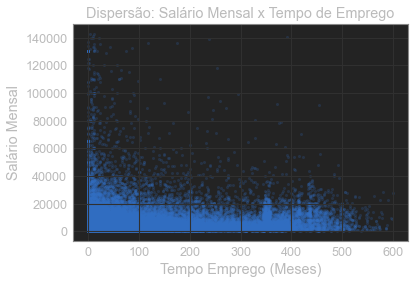

In [ ]:
plt.scatter(df['Tempo Emprego'], 
            df['Salário Mensal'], 
            marker = ".",
            alpha = 0.2
           )
plt.title('Dispersão: Salário Mensal x Tempo de Emprego')
plt.xlabel('Tempo Emprego (Meses)')
plt.ylabel("Salário Mensal")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

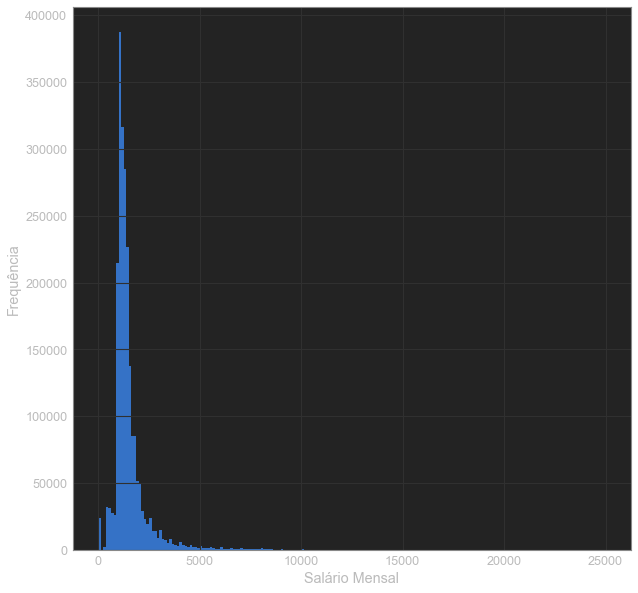

In [ ]:
#df['Salário Mensal'].fillna(df['Salário Mensal'].mean(), inplace=True)
histo_sal_mensal = plt.hist(df['Salário Mensal'], 
                             bins=200, 
                             range = (0,25000))
plt.xlabel('Salário Mensal')
plt.ylabel("Frequência")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

<AxesSubplot:>

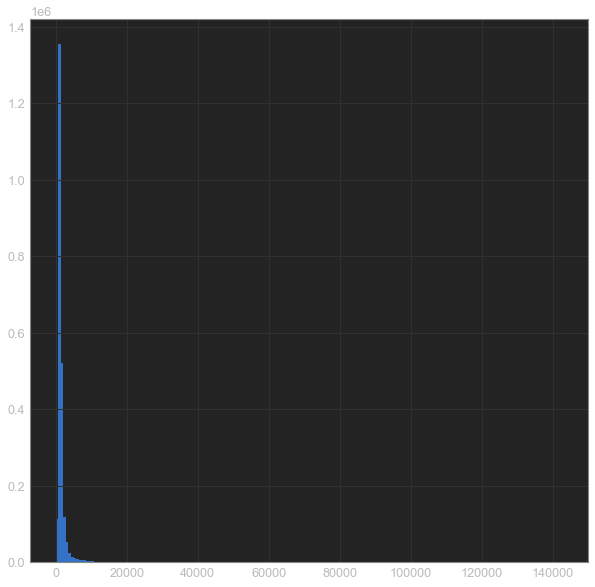

In [ ]:
df['Salário Mensal'].hist(bins = 200)

# Observação sobre a célula anterior
- No python, é usado todo o range da tabela e as vezes precisamos estudar uma parcela do gráfico, que é como fosse aplicado um zoom e conseguissemos entender como aquela parcela de dados se comporta
- Ao trocar o range, variando de 25000 em 25000, fiz o teste para 25000:50000, 50000:75000, 75000:140000...
- A conclusão que cheguei foi que em todas essa parcelas, o gráfico se comportou como uma normal descentralizada.

________________________________________________________________________________________________________________________________________________________________________________________________________________________________

### Teste de Shapiro_Wilks

O test shapiro-wilks é um indicador de quão bem os nossos dados se ajustam à distribuição normal. O primeiro parâmetro da estatística W (quando está próximo de 1 a distribuição é Gaussiana), e o segundo parâmetro é o p_valor (quando p_valor é maior que 0.05, a distribuição é Gaussiana).

In [ ]:
shap_test = df['Salário Mensal'].iloc[0:25000]
stats.shapiro(shap_test)

c:\arquivos de programas\python\python38\envs\mod0\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.3946847915649414, 0.0)

##### Parâmetro da estatística W = 0.394668 => Não está próximo de 1, não é Gaussiana
##### P_valor = 0 => Não é maior que 0.05, Não é Gaussiana
_______________________________________________________________________________________________________________________________

# Portanto vamos padronizar e normalizar os dados


# Padronização

### Uso do log1p
<font color='orange'>log1p - Soma 1 em todos os valores da coluna e quem era 0 passa a ser 1. (Deixando de ser necessário, realizar o tratamento para remover os zeros)</font>

### Para números negativos
<font color='orange'>Somar todos os valores da coluna pelo menor valor possível, o mais negativo possível da coluna, levando todos os dados para o lado positivo da curva</font>

In [ ]:
df['log_Salário'] = np.log1p(df['Salário Mensal'])

<AxesSubplot:>

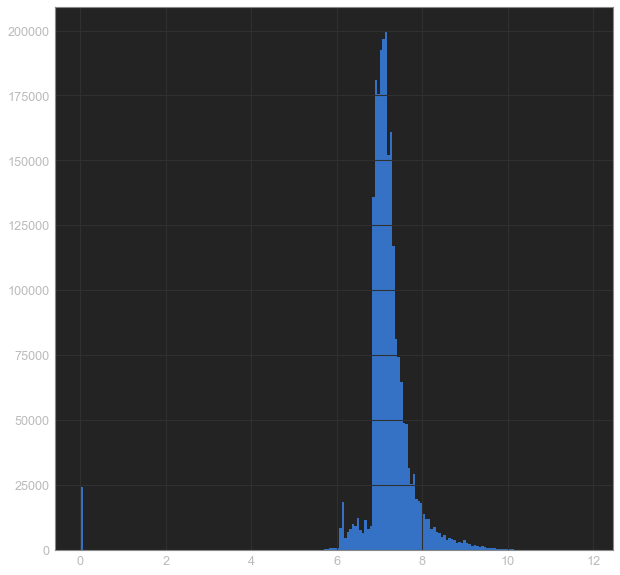

In [ ]:
df['log_Salário'].hist(bins = 200)

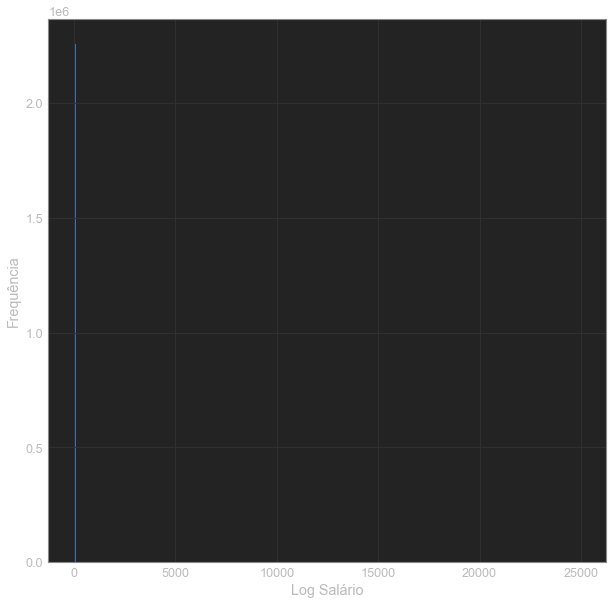

In [ ]:
histograma_padronizado = plt.hist(df['log_Salário'], 
                             bins = 200, 
                             range = (0, 25000)
                                 )
plt.xlabel('Log Salário')
plt.ylabel("Frequência")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

# Normalização

In [ ]:
df['normal_log_salário'] = ( df['log_Salário'] - df['log_Salário'].mean() ) / df['log_Salário'].std()

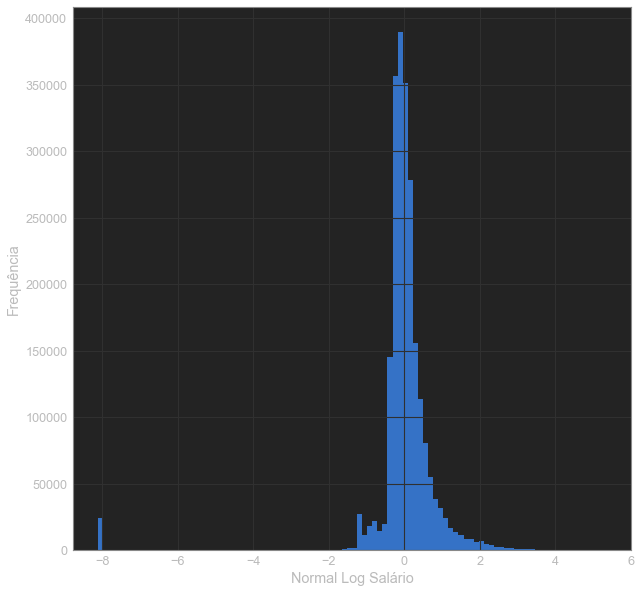

In [ ]:
histograma_normalizado = plt.hist(df['normal_log_salário'], 
                             bins=100, 
                             #range = (25000, 50000)
                                 )
plt.xlabel('Normal Log Salário')
plt.ylabel("Frequência")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

# Refazendo o teste de shapiro, depois de padronizar e normalizar

#### <font color='orange'> **Olhar aula de Inferência 2**</font>

In [ ]:
resultado_normalização = stats.shapiro(df['normal_log_salário'])
resultado_normalização

(0.505557656288147, 0.0)

# Verificando a média e o desvio padrão

In [ ]:
# definindo uma variável para os dados de salários transformados e normalizados
x = df['normal_log_salário']
# calculando a média
mu = np.mean(x)
# calculando o desvio-padrão populacional
std = np.std(x)
#Imprimindo a média e o desvio-padrão
mu,std

(3.3424681501685713e-15, 0.9999997784426223)

# Verificando o Z-Score

In [ ]:
st.norm.interval(alpha=0.95,loc=mu,scale=std)

(-1.95996355029557, 1.9599635502955766)

### 3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

In [ ]:
df['Idade'].mean()

32.314226374896315

In [ ]:
print('Idade mínima: ', df['Idade'].min(), 'anos')
print('Idade máxima: ', df['Idade'].max(), 'anos')
print('Idade média: ', df['Idade'].mean(), 'anos')

Idade mínima:  10 anos
Idade máxima:  103 anos
Idade média:  32.314226374896315 anos


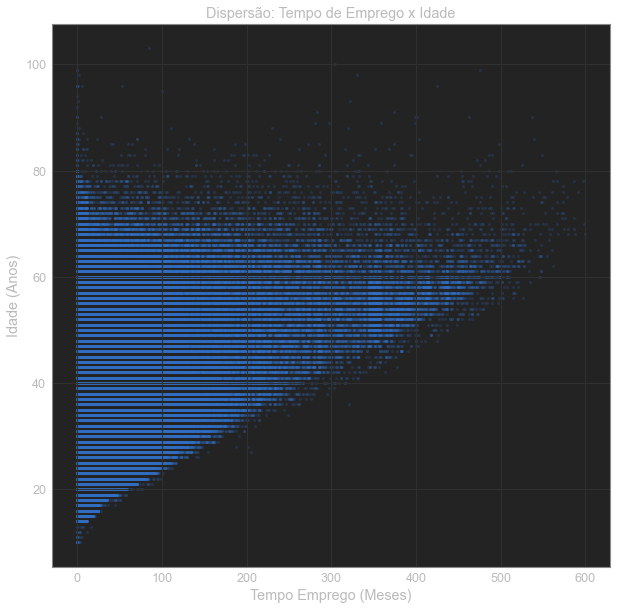

In [ ]:
plt.scatter(df['Tempo Emprego'], 
            df['Idade'], 
            marker = ".",
            alpha = 0.2
           )
plt.title('Dispersão: Tempo de Emprego x Idade')
plt.xlabel('Tempo Emprego (Meses)')
plt.ylabel("Idade (Anos)")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

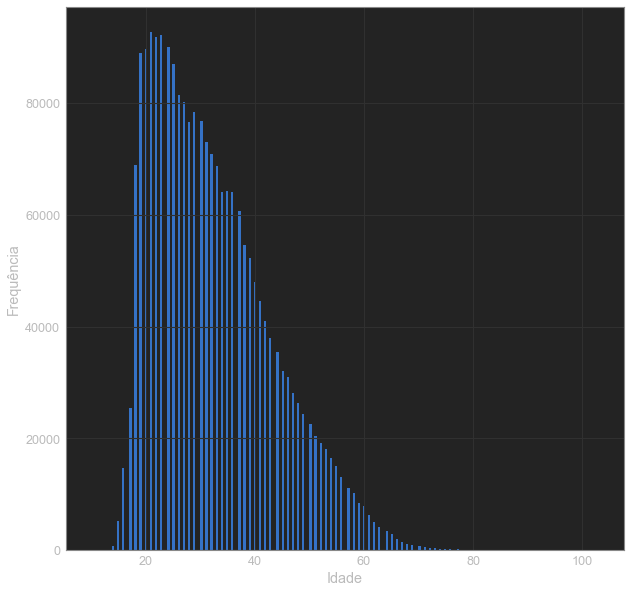

In [ ]:
histo_idade = plt.hist(df['Idade'], 
                       bins=200, 
                       #range = (0,10000000)
                      )
plt.xlabel('Idade')
plt.ylabel("Frequência")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [ ]:
shap_test2 = df['Idade'].iloc[0:25000]
stats.shapiro(shap_test2)

(0.9526928663253784, 0.0)

Parâmetro da estatística W = 0.952692 => Não está próximo de 1, é Gaussiana
P_valor = 0 => Não é maior que 0.05, Não é Gaussiana

<AxesSubplot:>

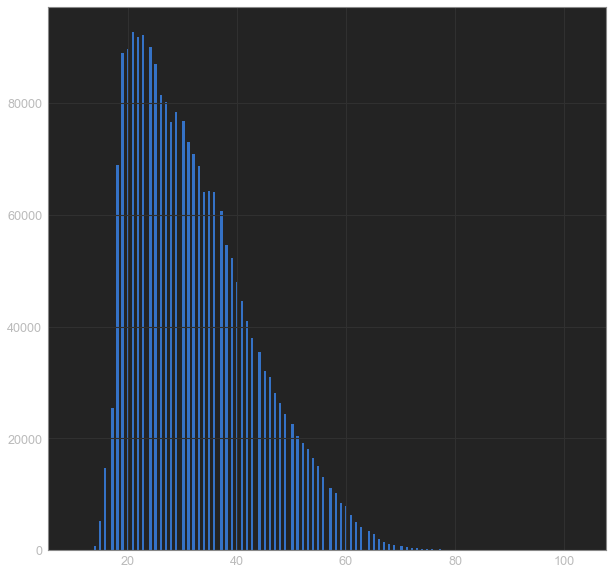

In [ ]:
df['Idade'].hist(bins = 200
                )

# Padronização

<AxesSubplot:>

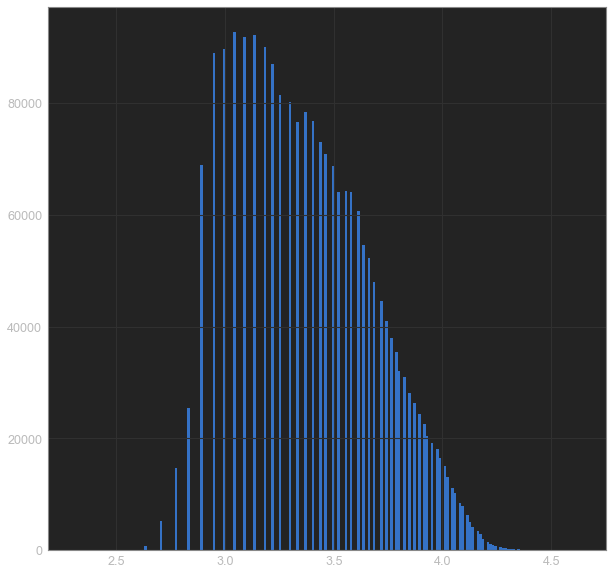

In [ ]:
df['log_Idade'] = np.log(df['Idade'])
df['log_Idade'].hist(bins = 200
                )

# Normalização

In [ ]:
df['normal_log_idade'] = ( df['log_Idade'] - df['log_Idade'].mean() ) / df['log_Idade'].std()

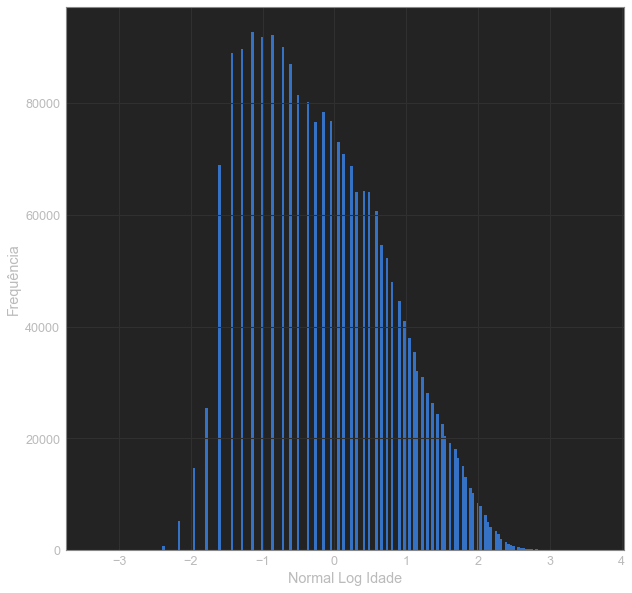

In [ ]:
histograma_normalizado = plt.hist(df['normal_log_idade'], 
                             bins=200, 
                            # range = (0, 25000)
                                 )
plt.xlabel('Normal Log Idade')
plt.ylabel("Frequência")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

# Correlação

In [ ]:
df_ex3 = df[['Idade','Salário Mensal']]
df_ex3.head()

,Idade,Salário Mensal
0,24,954.0
1,25,2500.0
2,55,0.0
3,52,0.0
4,32,0.0


In [ ]:
df['Idade'].corr(df['Salário Mensal']) 
stats.spearmanr(df['Idade'], df['Salário Mensal'])

SpearmanrResult(correlation=0.29049665848735234, pvalue=0.0)

#### <font color='orange'> corr menor que 0.3, desprezivel... Vamos plotar uma dispersão para tirar mais conclusões</font>

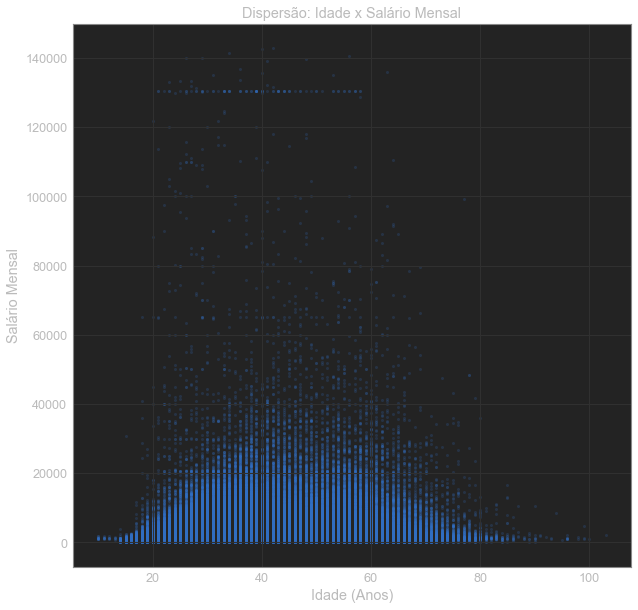

In [ ]:
plt.scatter(df['Idade'], 
            df['Salário Mensal'], 
            marker = ".",
            alpha = 0.2
           )
plt.title('Dispersão: Idade x Salário Mensal')
plt.xlabel('Idade (Anos)')
plt.ylabel("Salário Mensal")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [ ]:
# As duas váriaveis estão bem distribuidas entre si, mostrando que não tem muita correlação...
# Parece que a unica coisa que é possível analisar nesse gráfico acima é a linha de salário de 130k reais, que são pessoas que trabalham com Buffet (Bem estranho)

### 4. Verificação dos dados da variável Grau de Instrução: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados

In [ ]:
Grau_Instr_Bibl = {'Categoria': ['Analfabeto', 'Até 5ª Incompleto', '5ª Completo Fundamental', '6ª a 9ª Fundamental', 'Fundamental Completo', 'Médio Incompleto', 'Médio Completo', 'Superior Incompleto', 'Superior Completo', 'MESTRADO', 'DOUTORADO', 'IGNORADO'],
                   'Valores na fonte': [1,2,3,4,5,6,7,8,9,10,11,-1]
                  }
Grau_Instr_Bibli = pd.DataFrame(data=Grau_Instr_Bibl)
Grau_Instr_Bibli

,Categoria,Valores na fonte
0,Analfabeto,1
1,Até 5ª Incompleto,2
2,5ª Completo Fundamental,3
3,6ª a 9ª Fundamental,4
4,Fundamental Completo,5
5,Médio Incompleto,6
6,Médio Completo,7
7,Superior Incompleto,8
8,Superior Completo,9
9,MESTRADO,10


In [ ]:
s = {1: 'Analfabeto', 2: 'Até 5ª Incompleto', 3: '5ª Completo Fundamental', 4: '6ª a 9ª Fundamental', 5: 'Fundamental Completo', 6: 'Médio Incompleto', 7: 'Médio Completo', 8: 'Superior Incompleto', 9: 'Superior Completo', 10: 'MESTRADO', 11: 'DOUTORADO', -1: 'IGNORADO'}
s

{1: 'Analfabeto',
 2: 'Até 5ª Incompleto',
 3: '5ª Completo Fundamental',
 4: '6ª a 9ª Fundamental',
 5: 'Fundamental Completo',
 6: 'Médio Incompleto',
 7: 'Médio Completo',
 8: 'Superior Incompleto',
 9: 'Superior Completo',
 10: 'MESTRADO',
 11: 'DOUTORADO',
 -1: 'IGNORADO'}

In [ ]:
df['NovaCol'] = df['Grau Instrução'].map(s)
df

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo,Tempo Emprego,UF,log_Salário,normal_log_salário,log_Idade,normal_log_idade,NovaCol
0,1,201812,500215,2018,6,24,8,954.0,1,0.0,50,6.861711,-0.338373,3.178054,-0.734573,Médio Incompleto
1,1,201812,500710,2018,8,25,2,2500.0,1,0.0,50,7.824446,0.751796,3.218876,-0.610896,Superior Incompleto
2,1,201812,500460,2018,2,55,8,0.0,1,0.0,50,0.000000,-8.108356,4.007333,1.777875,Até 5ª Incompleto
3,1,201812,500460,2018,2,52,8,0.0,1,0.0,50,0.000000,-8.108356,3.951244,1.607942,Até 5ª Incompleto
4,1,201812,500460,2018,2,32,8,0.0,1,0.0,50,0.000000,-8.108356,3.465736,0.137010,Até 5ª Incompleto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256747,2,201812,221100,2018,9,59,8,5510.0,2,447.0,22,8.614501,1.646430,4.077537,1.990571,Superior Completo
2256748,2,201812,221100,2018,7,55,9,954.0,2,215.0,22,6.861711,-0.338373,4.007333,1.777875,Médio Completo
2256749,2,201812,221100,2018,7,61,8,1000.0,2,202.0,22,6.908755,-0.285103,4.110874,2.091570,Médio Completo
2256750,2,201812,221100,2018,8,22,2,1365.0,1,16.0,22,7.219642,0.066936,3.091042,-0.998190,Superior Incompleto


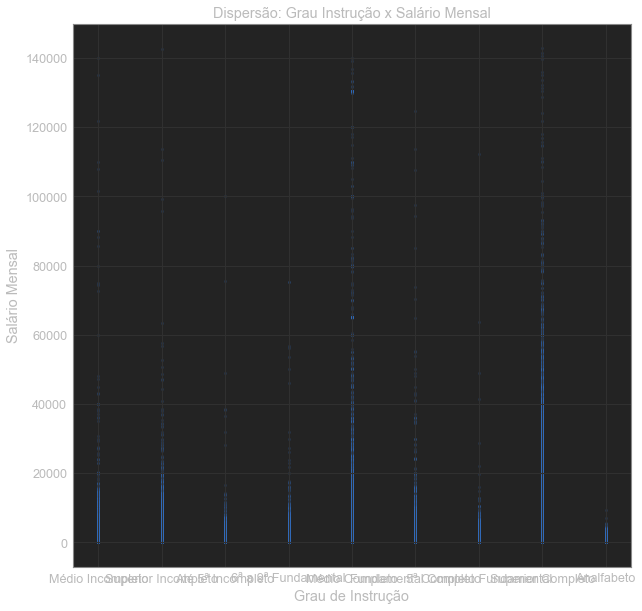

In [ ]:
plt.scatter(df['NovaCol'], 
            df['Salário Mensal'], 
            marker = ".",
            alpha = 0.2
           )
plt.title('Dispersão: Grau Instrução x Salário Mensal')
plt.xlabel('Grau de Instrução')
plt.ylabel("Salário Mensal")
plt.rcParams['figure.figsize'] = (100,10)
plt.show()

In [ ]:
#Correlação
df['Salário Mensal'].corr(df['Grau Instrução'])
# Essa variável não tem uma alta correlação,

0.18470180695812546

### 5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.


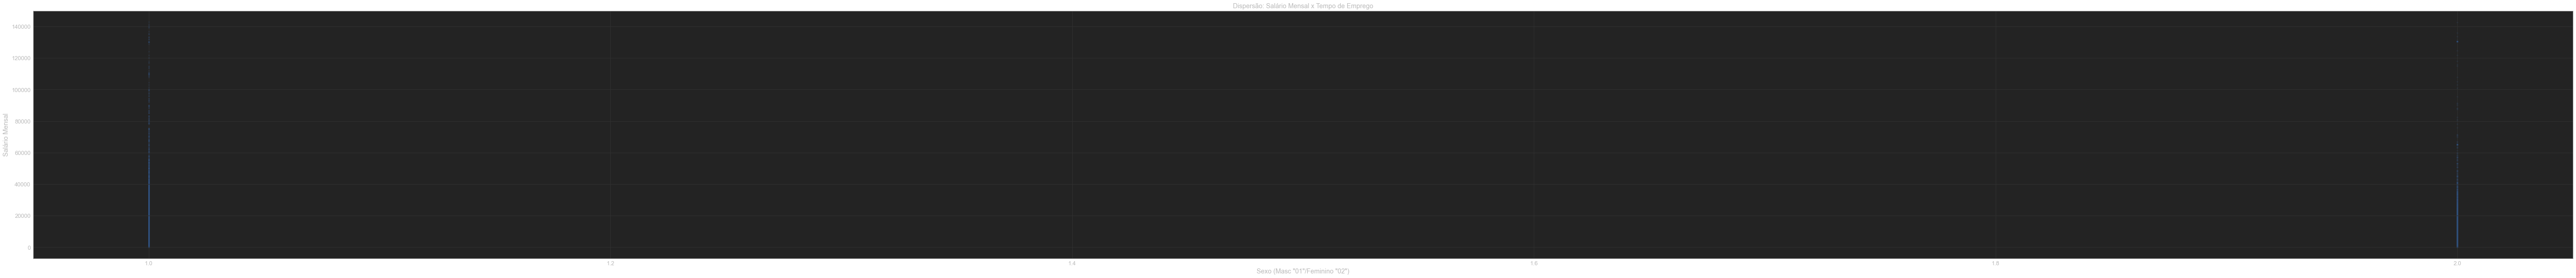

In [ ]:
plt.scatter(df['Sexo'], 
            df['Salário Mensal'], 
            marker = ".",
            alpha = 0.2
           )
plt.title('Dispersão: Salário Mensal x Tempo de Emprego')
plt.xlabel('Sexo (Masc "01"/Feminino "02")')
plt.ylabel("Salário Mensal")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

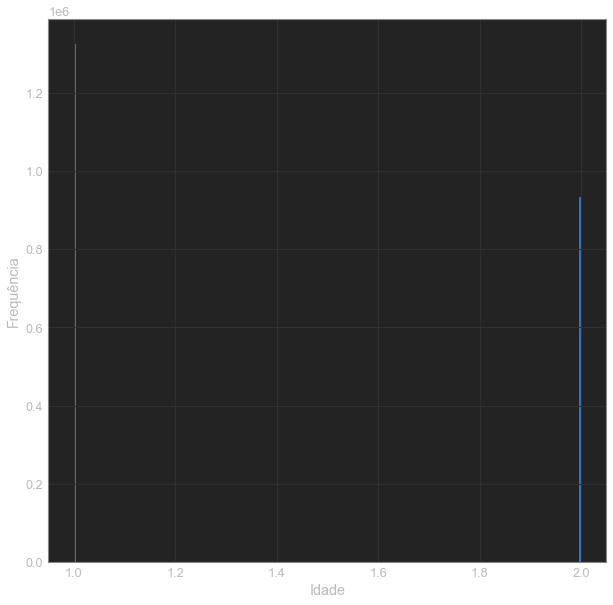

In [ ]:
histo_sexo = plt.hist(df['Sexo'], 
                       bins=200, 
                       #range = (0,10000000)
                      )
plt.xlabel('Idade')
plt.ylabel("Frequência")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [ ]:
#Correlação
df['Salário Mensal'].corr(df['Sexo'])

-0.04239430463953994

In [ ]:
df['Sexo'].dtype

dtype('int64')

In [ ]:
grouped = df[['Sexo', 'Salário Mensal']].groupby(df['Sexo'])
media = grouped.mean()
media

,Sexo,Salário Mensal
Sexo,,
1,1,1701.940527
2,2,1521.385129


In [ ]:
media['Sexo'].dtype

dtype('int64')

In [ ]:
j = {1: 'Masculino', 2:'Feminino'}
j

{1: 'Masculino', 2: 'Feminino'}

In [ ]:
media['Genero'] = media['Sexo'].map(j)
media.drop(columns = 'Sexo')
media.set_index('Genero')

,Sexo,Salário Mensal
Genero,,
Masculino,1,1701.940527
Feminino,2,1521.385129


In [ ]:
df_homens = df.loc[df['Sexo'] == 1]
df_mulheres = df.loc[df['Sexo'] == 2]
print('Soma dos salários dos homens', df_homens['Salário Mensal'].sum(), "reais")
print('Soma dos salários dos mulheres', df_mulheres['Salário Mensal'].sum(), "reais")

Soma dos salários dos homens 2251883464.0 reais
Soma dos salários dos mulheres 1420403191.0 reais


In [ ]:
media_M = media['Salário Mensal'][2]
media_H = media['Salário Mensal'][1]

In [ ]:
#Homens que ganham mais que a média das mulheres
df_homens.loc[df['Salário Mensal'] >= media_M]

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo,Tempo Emprego,UF,log_Salário,normal_log_salário,log_Idade,normal_log_idade,NovaCol
1,1,201812,500710,2018,8,25,2,2500.0,1,0.0,50,7.824446,0.751796,3.218876,-0.610896,Superior Incompleto
17,1,201812,500800,2018,5,18,8,1700.0,1,0.0,50,7.438972,0.315298,2.890372,-1.606157,Fundamental Completo
21,1,201812,500325,2018,7,35,2,5000.0,1,0.0,50,8.517393,1.536468,3.555348,0.408506,Médio Completo
23,1,201812,500210,2018,4,45,8,2123.0,1,0.0,50,7.661056,0.566779,3.806662,1.169908,6ª a 9ª Fundamental
24,1,201812,500210,2018,6,31,8,2123.0,1,0.0,50,7.661056,0.566779,3.433987,0.040822,Médio Incompleto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256725,2,201812,221120,2018,7,28,8,3000.0,1,26.0,22,8.006701,0.958176,3.332205,-0.267547,Médio Completo
2256727,2,201812,221100,2018,9,45,8,5475.0,1,109.0,22,8.608130,1.639215,3.806662,1.169908,Superior Completo
2256728,2,201812,221100,2018,9,44,8,5798.0,1,148.0,22,8.665441,1.704112,3.784190,1.101822,Superior Completo
2256729,2,201812,221000,2018,7,51,4,10849.0,1,373.0,22,9.291920,2.413518,3.931826,1.549112,Médio Completo


In [ ]:
#Mulheres que ganham mais que a média dos homens
df_mulheres.loc[df['Salário Mensal'] >= media_H]

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo,Tempo Emprego,UF,log_Salário,normal_log_salário,log_Idade,normal_log_idade,NovaCol
40,1,201812,500830,2018,7,24,8,2898.0,2,0.0,50,7.972121,0.919019,3.178054,-0.734573,Médio Completo
61,1,201812,500740,2018,6,25,2,2206.0,2,0.0,50,7.699389,0.610186,3.218876,-0.610896,Médio Incompleto
96,1,201812,500370,2018,9,28,2,1900.0,2,0.0,50,7.550135,0.441176,3.332205,-0.267547,Superior Completo
104,1,201812,500793,2018,8,22,8,2131.0,2,0.0,50,7.664816,0.571036,3.091042,-0.998190,Superior Incompleto
126,1,201812,500370,2018,9,26,2,2851.0,2,0.0,50,7.955776,0.900510,3.258097,-0.492070,Superior Completo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256730,2,201812,221100,2018,9,60,2,16079.0,2,483.0,22,9.685332,2.859004,4.094345,2.041491,Superior Completo
2256734,2,201812,221100,2018,7,25,8,3066.0,2,6.0,22,8.028455,0.982810,3.218876,-0.610896,Médio Completo
2256737,2,201812,221100,2018,9,51,2,3615.0,2,8.0,22,8.193124,1.169275,3.931826,1.549112,Superior Completo
2256746,2,201812,221100,2018,9,36,8,5724.0,2,48.0,22,8.652598,1.689569,3.583519,0.493855,Superior Completo


### 6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.


In [ ]:
l = {1: 'Indigena', 2: 'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Não identificado', -1:'Ignorado'}
df['RaçaCor_Lib'] = df['Raça Cor'].map(l)

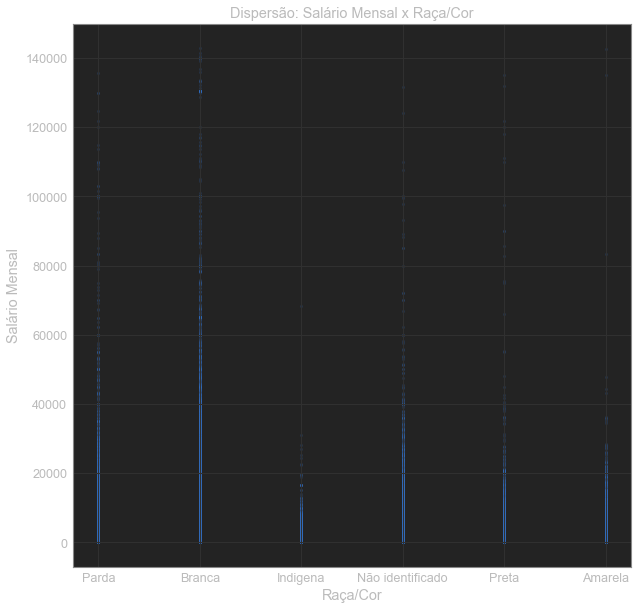

In [ ]:
plt.scatter(df['RaçaCor_Lib'], 
            df['Salário Mensal'], 
            marker = ".",
            alpha = 0.2
           )
plt.title('Dispersão: Salário Mensal x Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel("Salário Mensal")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [ ]:
df.loc[df['Salário Mensal'].max()]

Admitidos/Desligados                  2
Competência Declarada            201812
Município                        520870
Ano Declarado                      2018
Grau Instrução                        7
Idade                                30
Raça Cor                              8
Salário Mensal                      954
Sexo                                  1
Tempo Emprego                        19
UF                                   52
log_Salário                     6.86171
normal_log_salário            -0.338373
log_Idade                        3.4012
normal_log_idade             -0.0585204
NovaCol                  Médio Completo
RaçaCor_Lib                       Parda
Name: 142830, dtype: object

In [ ]:
df.loc[df['Salário Mensal'].min()]

Admitidos/Desligados                    1
Competência Declarada              201812
Município                          500215
Ano Declarado                        2018
Grau Instrução                          6
Idade                                  24
Raça Cor                                8
Salário Mensal                        954
Sexo                                    1
Tempo Emprego                           0
UF                                     50
log_Salário                       6.86171
normal_log_salário              -0.338373
log_Idade                         3.17805
normal_log_idade                -0.734573
NovaCol                  Médio Incompleto
RaçaCor_Lib                         Parda
Name: 0, dtype: object

In [ ]:
df['Salário Mensal'].corr(df['Raça Cor'])

-0.07772690357307918

In [ ]:
grouped_rc = df[['RaçaCor_Lib', 'Salário Mensal']].groupby(df['RaçaCor_Lib'])
media_rc = grouped_rc.mean()
media_rc

,Salário Mensal
RaçaCor_Lib,
Amarela,2111.330215
Branca,1824.911142
Indigena,1767.240125
Não identificado,1497.205830
Parda,1459.304828
Preta,1451.797236


In [ ]:
sal_amarelo = media_rc['Salário Mensal'][0]
sal_amarelo

2111.330215239306

In [ ]:
print('Amarelos que ganham mais que a maior média por raça:', df.loc[df['RaçaCor_Lib'] == 'Amarela'].loc[df['Salário Mensal'] >= media_H].shape[0],'pessoas')
print('Brancos que ganham mais que a maior média por raça:', df.loc[df['RaçaCor_Lib'] == 'Branca'].loc[df['Salário Mensal'] >= media_H].shape[0],'pessoas')
print('Indigenas que ganham mais que a maior média por raça:', df.loc[df['RaçaCor_Lib'] == 'Indigena'].loc[df['Salário Mensal'] >= media_H].shape[0],'pessoas')
print('Não Identificados que ganham mais que a maior média por raça:', df.loc[df['RaçaCor_Lib'] == 'Não identificado'].loc[df['Salário Mensal'] >= media_H].shape[0],'pessoas')
print('Pardos que ganham mais que a maior média por raça:', df.loc[df['RaçaCor_Lib'] == 'Parda'].loc[df['Salário Mensal'] >= media_H].shape[0],'pessoas')
print('Pretos que ganham mais que a maior média por raça:', df.loc[df['RaçaCor_Lib'] == 'Preta'].loc[df['Salário Mensal'] >= media_H].shape[0],'pessoas')

Amarelos que ganham mais que a maior média por raça: 2990 pessoas
Brancos que ganham mais que a maior média por raça: 252801 pessoas
Indigenas que ganham mais que a maior média por raça: 2290 pessoas
Não Identificados que ganham mais que a maior média por raça: 55591 pessoas
Pardos que ganham mais que a maior média por raça: 144456 pessoas
Pretos que ganham mais que a maior média por raça: 22984 pessoas


#### Os brancos ganham mais que os outros grupos étnicos

### 7. Elaborar uma hipótese para ser rejeitada ou não-rejeitada por você de acordo com o resultado da sua análise, através da utilização dos dados do CAGED considerando as suas colunas.

##### <font color='orange'> Hipótese Nula ($H_0$): Existem 45% ou mais pessoas admitidas do que demitidas no mercado de trabalho, de 2018 </font>
##### <font color='orange'> Hipótese Alternativa ($H_1$): Existem 45% menos pessoas admitidas do que demitidas no mercado de trabalho, de 2018 </font>
##### <font color='red'> Nível de significância de 5% </font>

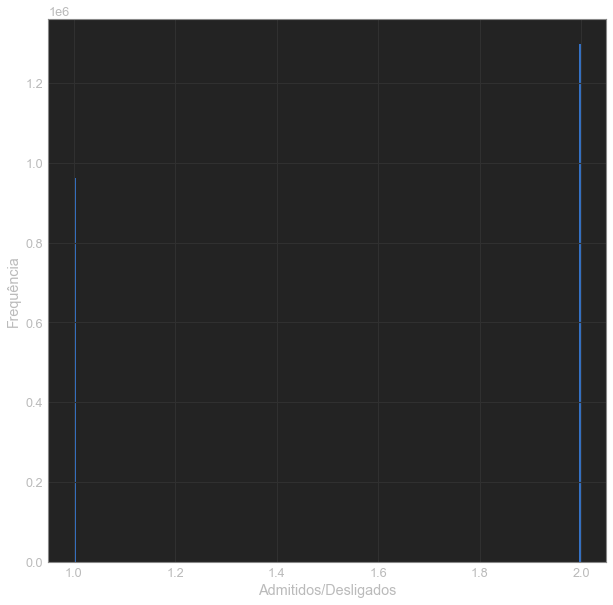

In [ ]:
histo_AD = plt.hist(df['Admitidos/Desligados'], 
                       bins=200, 
                       #range = (0,10000000)
                      )
plt.xlabel('Admitidos/Desligados')
plt.ylabel("Frequência")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [ ]:
#Admissão = 1
#Desligamento = 2

In [ ]:
#média
mean = df['Admitidos/Desligados'].mean()
#desvio padrão amostral
std = df['Admitidos/Desligados'].std()
#número de observações
n = len(df['Admitidos/Desligados'])

In [ ]:
# intervalo de confiança
# da tabela Z-Score: 0.05 / 2 = 0.025 --> 0.0615
mean - 0.0615*std/np.sqrt(n), mean + 0.0615*std/np.sqrt(n) 

(1.5740822722087529, 1.5741227587383781)

In [ ]:
# Calculando o intervalo de confiança pelo Scipy.Stats
st.norm.interval(alpha=0.05, loc=mean, scale=std/np.sqrt(n))

(1.5740818749872005, 1.5741231559599305)

In [ ]:
# isolando os limites de valor inferior e superior
limite_inferior = st.norm.interval(alpha=0.05, loc=mean, scale=std/np.sqrt(n))[0]
limite_superior = st.norm.interval(alpha=0.05, loc=mean, scale=std/np.sqrt(n))[1]

In [ ]:
limite_inferior, limite_superior

(1.5740818749872005, 1.5741231559599305)

In [ ]:
p_H0 = 0.45
limite_inferior < p_H0 < limite_superior

False

In [ ]:
sided_p_value = st.norm(loc=mean, scale=std/np.sqrt(n)).sf(0.45) 
sided_p_value

1.0

In [ ]:
p_value = 2*sided_p_value
p_value

2.0

In [ ]:
stats.ttest_ind(a=df['Admitidos/Desligados'] == 2,
                b=df['Admitidos/Desligados'] == 1, 
                equal_var = False)

Ttest_indResult(statistic=318.3776024547895, pvalue=0.0)

In [ ]:
#Conclusão: que existem mais pessoas desligadas do que empregadas, no mercado de trabalho.

#### 8. Avançado: plote um SEABORN heatmap com **todas as correlações das variávies numéricas entre si**. 

In [ ]:
df_heatmap = df.drop(columns = ['NovaCol', 'log_Salário', 'normal_log_salário', 'log_Idade', 'normal_log_idade', 'RaçaCor_Lib', 'Competência Declarada', 'Ano Declarado' ])

In [ ]:
df_heatmap.corr()
#sns.heatmap(df_heatmap)

,Admitidos/Desligados,Município,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo,Tempo Emprego,UF
Admitidos/Desligados,1.000000,0.009665,-0.031150,0.110487,-0.039206,0.044920,-0.013509,0.332575,0.009635
Município,0.009665,1.000000,-0.012695,-0.012762,-0.149845,0.026354,0.027401,-0.005550,0.999744
Grau Instrução,-0.031150,-0.012695,1.000000,-0.110878,-0.062680,0.184702,0.205090,0.041182,-0.013805
Idade,0.110487,-0.012762,-0.110878,1.000000,-0.036528,0.151294,-0.066302,0.276203,-0.013023
Raça Cor,-0.039206,-0.149845,-0.062680,-0.036528,1.000000,-0.077727,-0.059259,-0.092636,-0.147059
Salário Mensal,0.044920,0.026354,0.184702,0.151294,-0.077727,1.000000,-0.042394,0.201733,0.024928
Sexo,-0.013509,0.027401,0.205090,-0.066302,-0.059259,-0.042394,1.000000,0.009666,0.026933
Tempo Emprego,0.332575,-0.005550,0.041182,0.276203,-0.092636,0.201733,0.009666,1.000000,-0.005795
UF,0.009635,0.999744,-0.013805,-0.013023,-0.147059,0.024928,0.026933,-0.005795,1.000000


<AxesSubplot:>

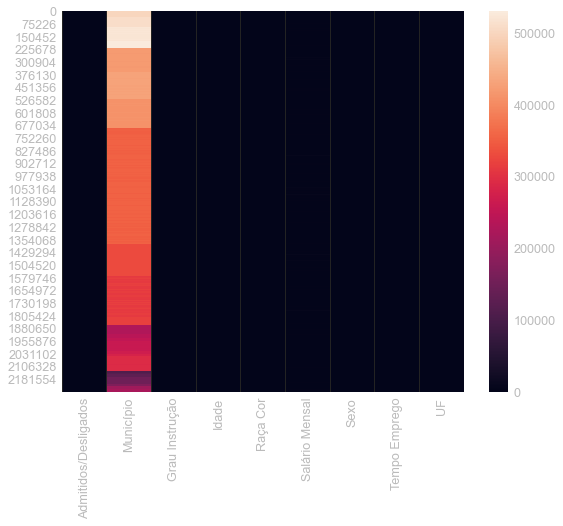

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7)) 

sns.heatmap(
    df_heatmap,
   )